<div style="text-align: center; font-size: 20px;"><b>Stats216v: Statistical Learning</b></div>

<br>
<div style="text-align: center">Stanford University</div>
<div style="text-align: center">Summer 2017</div>
<div style="text-align: center">Gyu-Ho Lee (<a href="mailto:gyuhox@gmail.com">gyuhox@gmail.com</a>)</div>

###### Q1.

In this problem we investigate a simple example of hierarchical clustering. Problem 4 will use this method on a real data set.

Suppose that we have four observations, for which we compute a dissimilarity matrix, given by

$
\begin{bmatrix}
   & 0.3 & 0.4 & 0.7 \\
  0.3  & & 0.5 & 0.8 \\
  0.4 & 0.5 & & 0.45 \\
  0.7 & 0.8 & 0.45 &
\end{bmatrix}
$

For instance, the dissimilarity between the first and second observations is 0.3, and the
dissimilarity between the second and fourth observation is 0.8.

<span style="color:blue">
Gyu-Ho's Answer: I will use *Algorithm 10.2 Hierarchical Clustering at page 395*.
</span>

(a) Based on this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using **complete linkage**. Indicate on the plot the height at which each fusion occurs and the observations corresponding to each leaf of the dendrogram.

In [2]:
matrix(c(0, 0.3, 0.4, 0.7,
         0.3, 0, 0.5, 0.8,
         0.4, 0.5, 0.0, 0.45,
         0.7, 0.8, 0.45, 0.0), nrow=4)

# 0.3 is the minimum dissimilarity
# complete linkage records the largest

0.0,0.3,0.40,0.70
0.3,0.0,0.50,0.80
0.4,0.5,0.00,0.45
0.7,0.8,0.45,0.00


In [3]:
# thus, fuse first and second observations
# after fuse, new dissimilarity matrix
matrix(c(0,   0.5, 0.8,
         0.5, 0.0, 0.45,
         0.8, 0.45, 0.0), nrow=3)

# now 0.45 is the minimum dissimilarity

0.0,0.50,0.80
0.5,0.00,0.45
0.8,0.45,0.00


In [4]:
# thus, fuse third and fourth observations
# after fuse, new dissimilarity matrix
matrix(c(0, 0.8,
         0.8, 0.0), nrow=2)

0.0,0.8
0.8,0.0


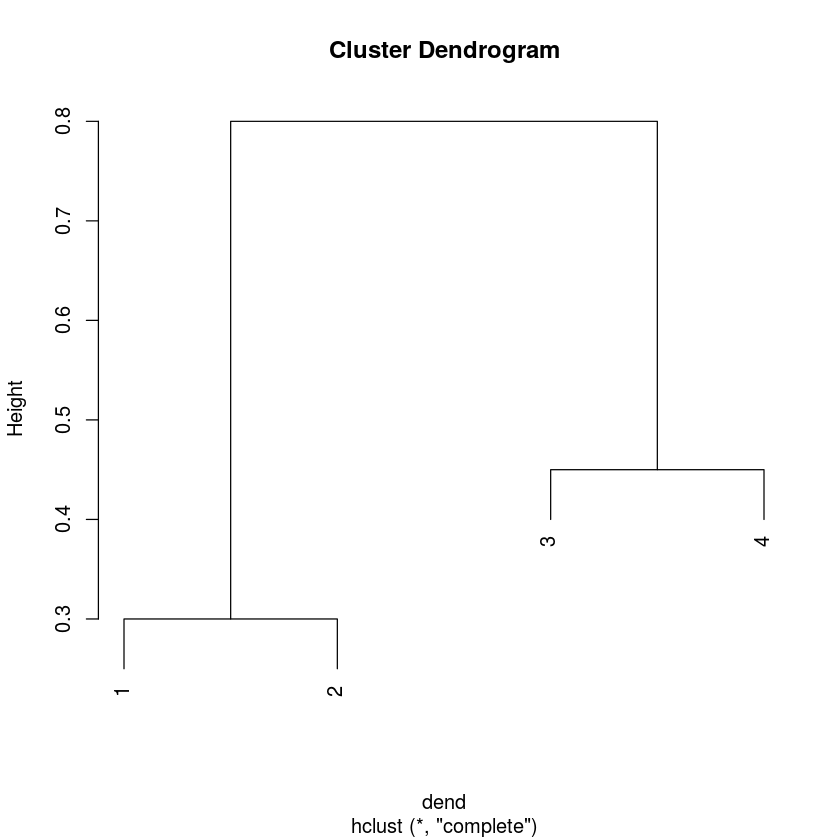

In [5]:
# lastly fuse clusters (1,2) and (3,4)
dend = as.dist(matrix(c(0, 0.3, 0.4, 0.7,
                        0.3, 0, 0.5, 0.8,
                        0.4, 0.5, 0.0, 0.45,
                        0.7, 0.8, 0.45, 0.0), nrow=4))

plot(hclust(dend,method="complete"))

(b) Repeat part (a) using **single linkage** clustering.

In [6]:
matrix(c(0, 0.3, 0.4, 0.7,
         0.3, 0, 0.5, 0.8,
         0.4, 0.5, 0.0, 0.45,
         0.7, 0.8, 0.45, 0.0), nrow=4)

# 0.3 is the minimum dissimilarity
# single linkage records the smallest

0.0,0.3,0.40,0.70
0.3,0.0,0.50,0.80
0.4,0.5,0.00,0.45
0.7,0.8,0.45,0.00


In [7]:
# thus, fuse first and second observations
# after fuse, new dissimilarity matrix
matrix(c(0,   0.4, 0.7,
         0.4, 0.0, 0.45,
         0.7, 0.45, 0.0), nrow=3)

# now 0.4 is the minimum dissimilarity

0.0,0.40,0.70
0.4,0.00,0.45
0.7,0.45,0.00


In [8]:
# thus, fuse third and fourth observations
# after fuse, new dissimilarity matrix
matrix(c(0, 0.45,
         0.45, 0.0), nrow=2)

0.00,0.45
0.45,0.00


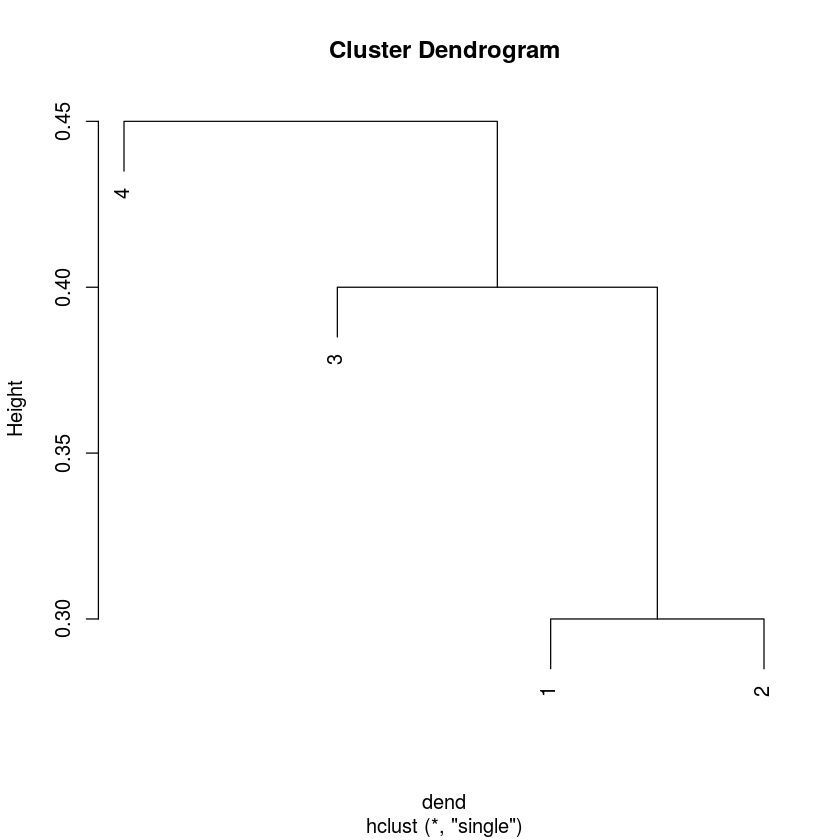

In [9]:
# lastly fuse clusters ((1,2),3) and (4)
dend = as.dist(matrix(c(0, 0.3, 0.4, 0.7,
                        0.3, 0, 0.5, 0.8,
                        0.4, 0.5, 0.0, 0.45,
                        0.7, 0.8, 0.45, 0.0), nrow=4))

plot(hclust(dend,method="single"))

(c) Suppose that we cut the dendrogram from (a) in such a way that results in two
clusters. Which observations are in each cluster?

<span style="color:blue">
Gyu-Ho's Answer: Two clusters of (1,2) and (3,4).
</span>

(d) Suppose that we cut the dendrogram from (b) in such a way that results in two clusters. Which observations are in each cluster?

<span style="color:blue">
Gyu-Ho's Answer: Two clusters of ((1,2),3) and (4).
</span>

###### Q2.

Here we explore the maximal margin classifier on a toy data set.

(a) We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label. Sketch the observations.

| Obs. | $X_1$ | $X_2$ | $Y$ |
|---|---|---|---|
|1|13.58|17.50|blue|
|2|9.60|9.60|blue|
|3|17.60|17.60|blue|
|4|5.56|17.60|blue|
|5|9.60|5.60|red|
|6|17.60|13.60|red|
|7|17.58|5.60|red|

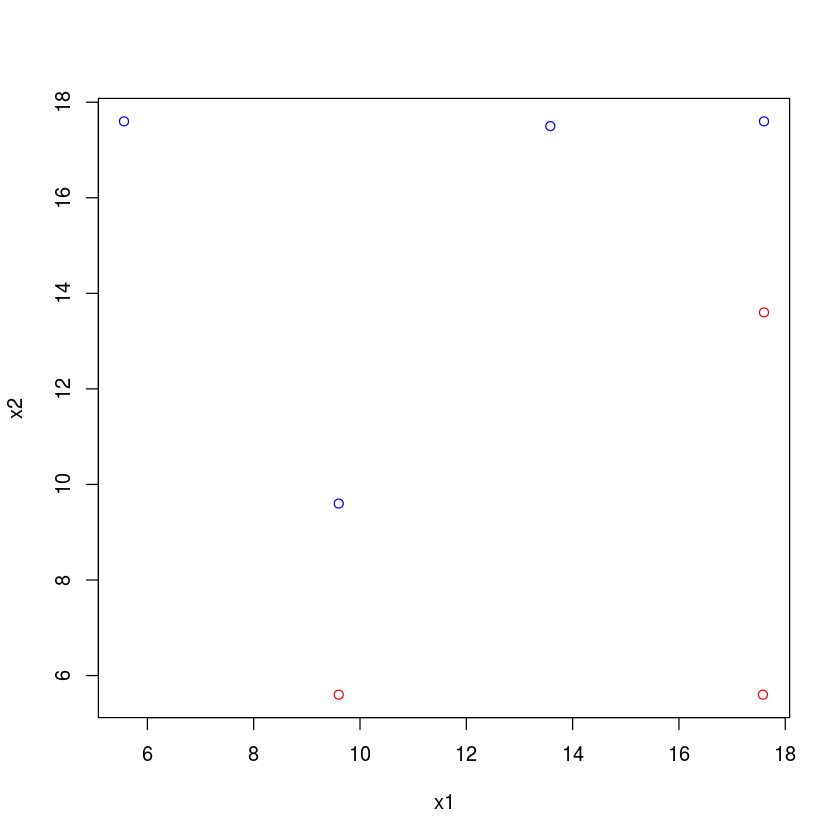

In [10]:
x1=c(13.58,9.60,17.60,5.56,9.60,17.60,17.58)
x2=c(17.50,9.60,17.60,17.60,5.60,13.60,5.60)
colors=c("blue","blue","blue","blue","red","red","red")
plot(x1,x2,col=colors)

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$).

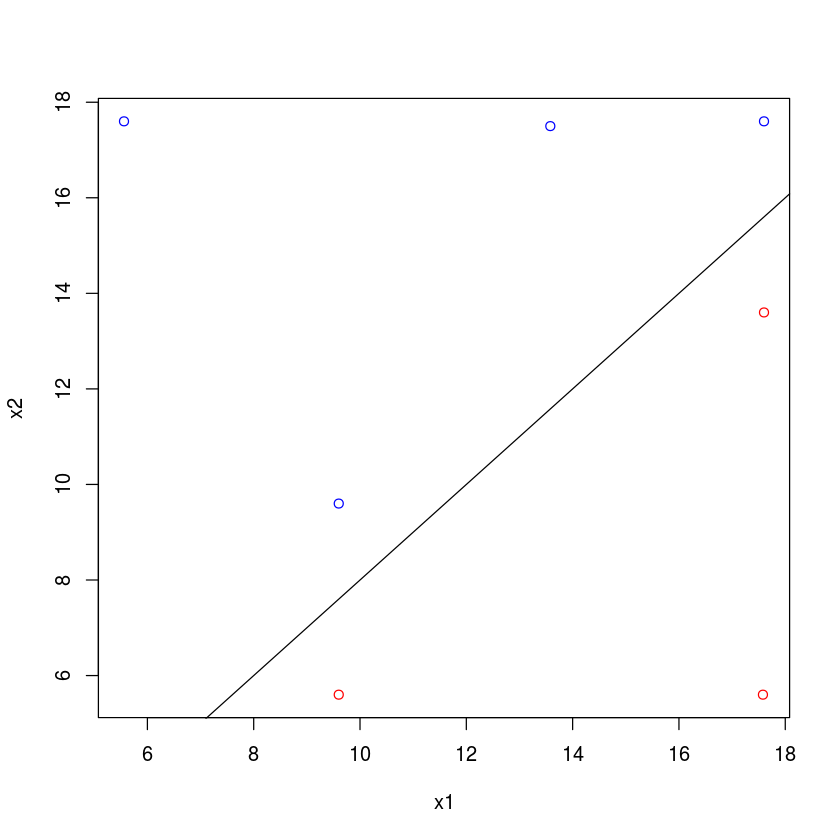

In [11]:
plot(x1,x2,col=colors)

# between (9.60,9.60),(17.60,17.60)
#     and (9.60,5.60),(17.60,13.60)
#
# line passes (9.6,7.6) and (17.6,15.6)
abline(-2,1) # y=x-2

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0$, and classify to Green otherwise.” Provide the values for $\beta_0$, $\beta_1$, and $\beta_2$.

<span style="color:blue">
Gyu-Ho's Answer: Classify to Blue if $X_1 - X_2 - 2 < 0$, and classify to Red otherwise.
</span>

(d) On your sketch, indicate the margin for the maximal margin hyperplane. How wide is the margin?

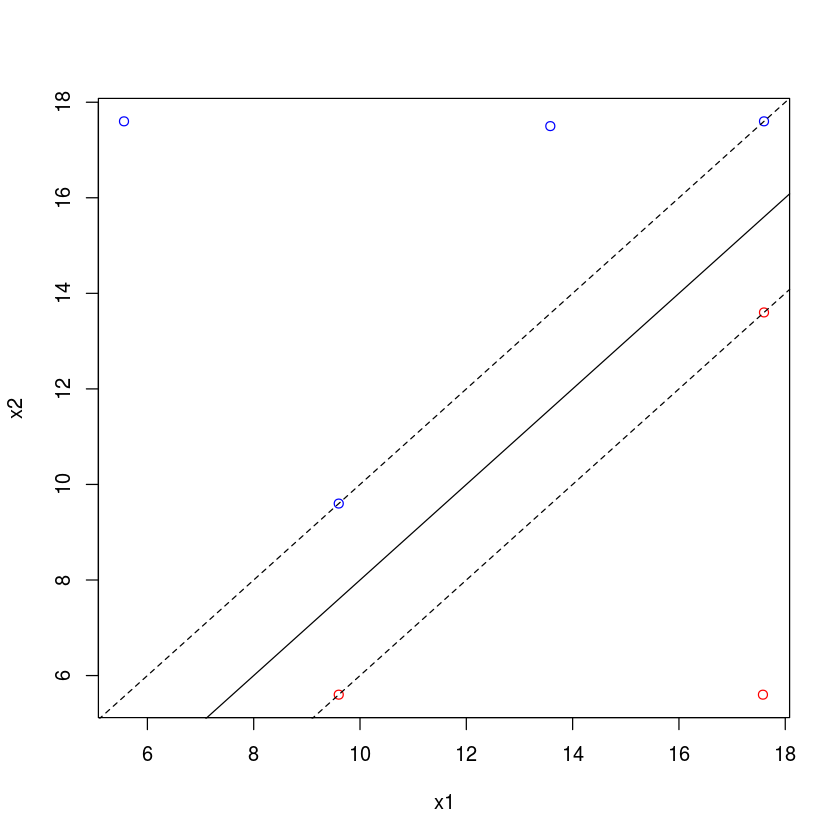

In [12]:
plot(x1,x2,col=colors)
abline(-2,1) # y=x-2
abline(0,1,lty=2) # y=x
abline(-4,1,lty=2) # y=x-4

<span style="color:blue">
Gyu-Ho's Answer: Margin is the smallest distance from the observations to the hyperplane. It's $\sqrt{2}$.
</span>

(e) Indicate the support vectors for the maximal margin classifier.

<span style="color:blue">
Gyu-Ho's Answer: Support vectors are (9.60,9.60),(17.60,17.60) and (9.60,5.60),(17.60,13.60).
</span>

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

<span style="color:blue">
Gyu-Ho's Answer: Seventh observation is located at right-bottom (17.58,5.6) and not a support vector. It is far away from the hyperplane, so moving the seventh observation would not change the maximal margin hyperplane.
</span>

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

<span style="color:blue">
Gyu-Ho's Answer: $X_1 - X_2 - 1 = 0$ is not the optimal separating hyperplane as shown below.
</span>

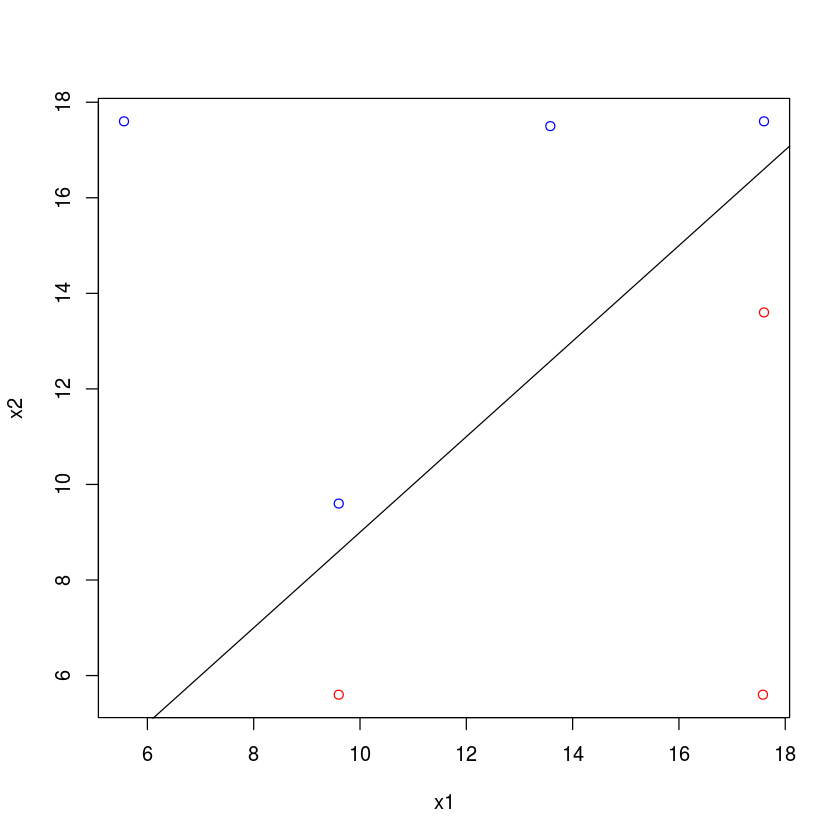

In [13]:
plot(x1,x2,col=colors)
abline(-1,1)

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

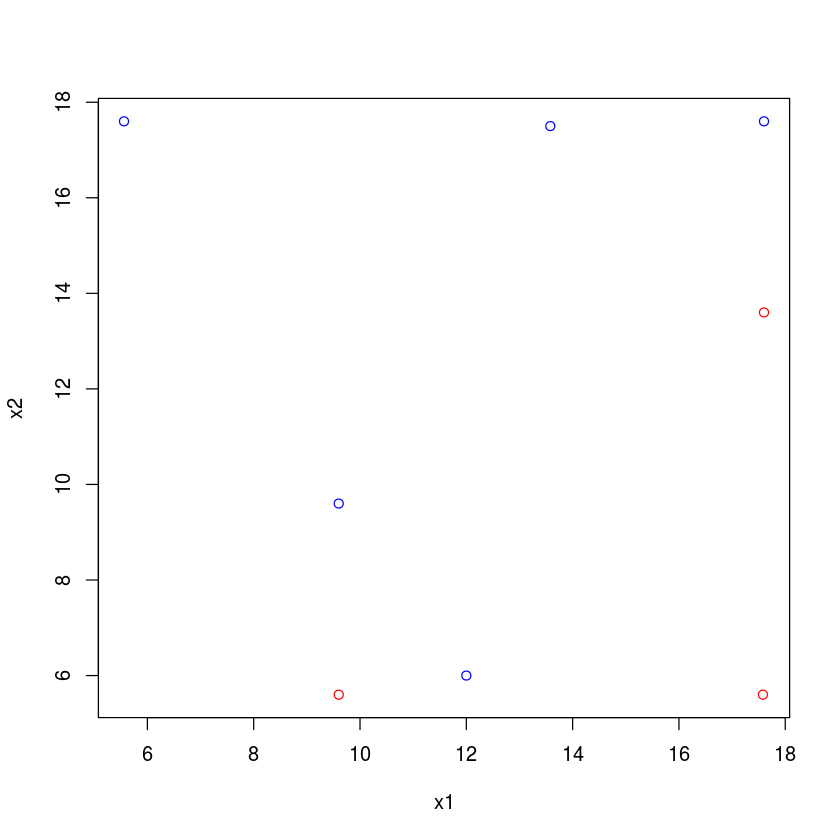

In [14]:
plot(x1,x2,col=colors)
points(c(12),c(6),col=c("blue")) # additional observation

In [85]:
LoadLibraries = function() {
    install.packages("ISLR")
    library(ISLR)
    install.packages("e1071")
    library(e1071)
    install.packages("dendextend")
    library(dendextend)
    install.packages("pls")
    library(pls)
    print("Libraries have been loaded!")
}

LoadLibraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



[1] "Libraries have been loaded!"


###### Q3.

This problem involves the OJ data set which is part of the ISLR package.

(a) Create a training set containing a random sample of 535 observations, and a test set containing the remaining observations. Use the commands `set.seed(2017); train = sample(1:nrow(OJ), 535); test = setdiff(1:nrow(OJ), train)`.

In [16]:
attach(OJ)
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [17]:
set.seed(2017)

train=sample(1:nrow(OJ), 535)
test=setdiff(1:nrow(OJ), train)

(b) Fit a (linear) support vector classifier to the training data using `cost=1`, with Purchase as the response and the other variables as predictors. Use the `summary()` function to produce summary statistics about the SVM, and describe the results obtained.

In [18]:
OJ.train=OJ[train,]
OJ.test=OJ[-train,]
svmfit=svm(Purchase~., data=OJ.train, kernel="linear", cost=1)
summary(svmfit)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.05555556 

Number of Support Vectors:  227

 ( 115 112 )


Number of Classes:  2 

Levels: 
 CH MM




<span style="color:blue">
Gyu-Ho's Answer: This tells us that a linear kernel was used with cost parameter 1. And there are 227 support vectors: 115 in one class, 112 in the other class. Two classes are `CH` and `MM`.
</span>

(c) What are the training and test error rates?

In [19]:
OJ.train.pred=predict(svmfit)
OJ.test.pred=predict(svmfit, newdata=OJ.test)
OJ.train.table=table(Predict=OJ.train.pred, Truth=OJ.train$Purchase)
OJ.test.table=table(Predict=OJ.test.pred, Truth=OJ.test$Purchase)
OJ.train.table
OJ.test.table

       Truth
Predict  CH  MM
     CH 277  49
     MM  41 168

       Truth
Predict  CH  MM
     CH 291  46
     MM  44 154

In [20]:
# training error rate
(OJ.train.table[1,2]+OJ.train.table[2,1])/sum(OJ.train.table)

[1] 0.1682243

In [21]:
# test error rate
(OJ.test.table[1,2]+OJ.test.table[2,1])/sum(OJ.test.table)

[1] 0.1682243

(d) Use the `tune()` function to select an optimal cost. Consider values in the range 0.01 to 10.

In [22]:
# cost range
costs=seq(.01, 10, 100)
svmfit.tune=tune(svm,
                 Purchase~.,
                 data=OJ,
                 kernel="linear",
                 ranges=list(cost=costs),
                )

svmfit.tune$best.model


Call:
best.tune(method = svm, train.x = Purchase ~ ., data = OJ, ranges = list(cost = costs), 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  560


<span style="color:blue">
Gyu-Ho's Answer: 0.01 is already the optimal cost.
</span>

(e) Compute the training and test error rates using this new value for cost.

In [23]:
OJ.train=OJ[train,]
OJ.test=OJ[-train,]
svmfit=svm(Purchase~., data=OJ.train, kernel="linear", cost=0.01)

OJ.train.pred=predict(svmfit)
OJ.test.pred=predict(svmfit, newdata=OJ.test)
OJ.train.table=table(Predict=OJ.train.pred, Truth=OJ.train$Purchase)
OJ.test.table=table(Predict=OJ.test.pred, Truth=OJ.test$Purchase)

In [24]:
# training error rate
(OJ.train.table[1,2]+OJ.train.table[2,1])/sum(OJ.train.table)

[1] 0.1757009

In [25]:
# test error rate
(OJ.test.table[1,2]+OJ.test.table[2,1])/sum(OJ.test.table)

[1] 0.164486

(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [26]:
costs=seq(.01, 10, 100)
svmfit.tune.radial=tune(svm,
                        Purchase~.,
                        data=OJ,
                        kernel="radial",
                        ranges=list(cost=costs),
                       )

svmfit.tune.radial$best.model


Call:
best.tune(method = svm, train.x = Purchase ~ ., data = OJ, ranges = list(cost = costs), 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  837


In [27]:
OJ.radial.train.pred=predict(svmfit.tune.radial$best.model, OJ.train)
OJ.radial.test.pred=predict(svmfit.tune.radial$best.model, OJ.test)

OJ.radial.train.table=table(
    Predict=OJ.radial.train.pred,
    Truth=OJ.train$Purchase)

OJ.radial.test.table=table(
    Predict=OJ.radial.test.pred,
    Truth=OJ.train$Purchase)

In [28]:
OJ.radial.train.table

       Truth
Predict  CH  MM
     CH 318 217
     MM   0   0

In [29]:
OJ.radial.test.table # radial dose not fit well in this case

       Truth
Predict  CH  MM
     CH 318 217
     MM   0   0

(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel of degree 2.

In [30]:
costs=seq(.01, 10, 100)
svmfit.tune.poly=tune(svm,
                      Purchase~.,
                      data=OJ,
                      kernel="polynomial",
                      degree=2,
                      ranges=list(cost=costs),
                     )

OJ.poly.train.pred=predict(svmfit.tune.poly$best.model, OJ.train)
OJ.poly.test.pred=predict(svmfit.tune.poly$best.model, OJ.test)

OJ.poly.train.table=table(
    Predict=OJ.poly.train.pred,
    Truth=OJ.train$Purchase)

OJ.poly.test.table=table(
    Predict=OJ.poly.test.pred,
    Truth=OJ.train$Purchase)

# polynomial approach does not fit well either
OJ.poly.train.table
OJ.poly.test.table

       Truth
Predict  CH  MM
     CH 314 208
     MM   4   9

       Truth
Predict  CH  MM
     CH 299 213
     MM  19   4

(h) Repeat parts (b) through (e) using a linear support vector machine, applied to an expanded feature set consisting of linear and all possible quadratic terms for the predictors. How does this compare to the polynomial kernel both conceptually and in terms of the results for this problem?

In [41]:
names(OJ)

[1] "Purchase"       "WeekofPurchase" "StoreID"        "PriceCH"       
 [5] "PriceMM"        "DiscCH"         "DiscMM"         "SpecialCH"     
 [9] "SpecialMM"      "LoyalCH"        "SalePriceMM"    "SalePriceCH"   
[13] "PriceDiff"      "Store7"         "PctDiscMM"      "PctDiscCH"     
[17] "ListPriceDiff"  "STORE"

In [51]:
costs=seq(.01, 10, 100)
svmfit.tune.all=tune(svm,
                      Purchase~poly(WeekofPurchase,2)
                     +poly(StoreID,2)
                     +poly(PriceCH,2)
                     +poly(PriceMM,2)
                     +poly(DiscCH,2)
                     +poly(DiscMM,2)
                     +poly(LoyalCH,2)
                     +poly(SalePriceMM,2)
                     +poly(SalePriceCH,2)
                     +poly(PriceDiff,2)
                     +poly(PctDiscMM,2)
                     +poly(PctDiscCH,2)
                     +poly(ListPriceDiff,2)
                     +poly(STORE,2),
                      data=OJ,
                      kernel="linear",
                      degree=2,
                      ranges=list(cost=costs),
                     )

OJ.all.train.pred=predict(svmfit.tune.all$best.model, OJ.train)
OJ.all.test.pred=predict(svmfit.tune.all$best.model, OJ.test)

OJ.all.train.table=table(
    Predict=OJ.all.train.pred,
    Truth=OJ.train$Purchase)

OJ.all.test.table=table(
    Predict=OJ.all.test.pred,
    Truth=OJ.train$Purchase)

# linear approach with all possible quadratic terms does not fit well either
OJ.all.train.table
OJ.all.test.table

       Truth
Predict  CH  MM
     CH 285  69
     MM  33 148

       Truth
Predict  CH  MM
     CH 207 154
     MM 111  63

<span style="color:blue">
Gyu-Ho's Answer: Linear kernel above just adds quadratic terms with existing linear ones. However, decision boundary is still the linear. Polynomial kernel uses polynomial decision boundary. Since linear model performs well in this data, linear kernel with quadratic terms still performs better than polynomial kernel with polynomial decision boundary.
</span>

(i) Overall, which approach seems to give the best results on this data?

<span style="color:blue">
Gyu-Ho's Answer: Linear support vector classifier gives the best results (lowest test error rate).
</span>

###### Q4.

In this problem we will explore K-means and hierarchical clustering on a wheat seed data set. The data file `SeedData.csv` is available on the class website. There are `n = 210` seeds with `p = 7` real valued features for each observation. The data set is from Lichman, M. (2013) from the UCI Machine Learning Repository 1. You can find a full description of the data at http://archive.ics.uci.edu/ml/datasets/seeds#.

In [60]:
seeds=read.table("hw-4-seeds_dataset.txt")
head(seeds)

seeds.labels=seeds[,8]
seeds.data=seeds[,1:7]

V1,V2,V3,V4,V5,V6,V7,V8
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


(a) Set `set.seed(2017)`. Using the `kmeans()` function, perform K-means clustering (using all 7 features) with `K = 3` and 20 random starting positions. Plot the data in terms of the variables in the 2nd and 6th columns, with the points colored according to the clusters you just obtained.

In [65]:
set.seed(2017)
km.out=kmeans(seeds.data,3,nstart=20)
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 [38] 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 3 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3

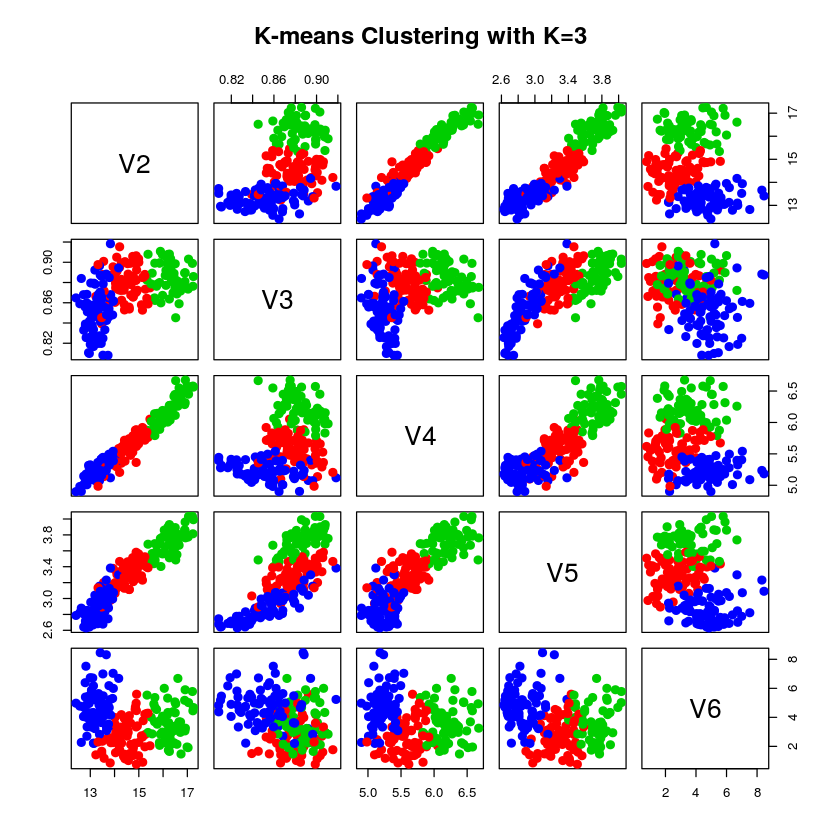

In [66]:
plot(seeds.data[,2:6], col=(km.out$cluster+1), main="K-means Clustering with K=3", pch=20, cex=2)

(b) Using the `hclust()` function, perform single linkage hierarchical clustering on the data. Plot the corresponding dendrogram.

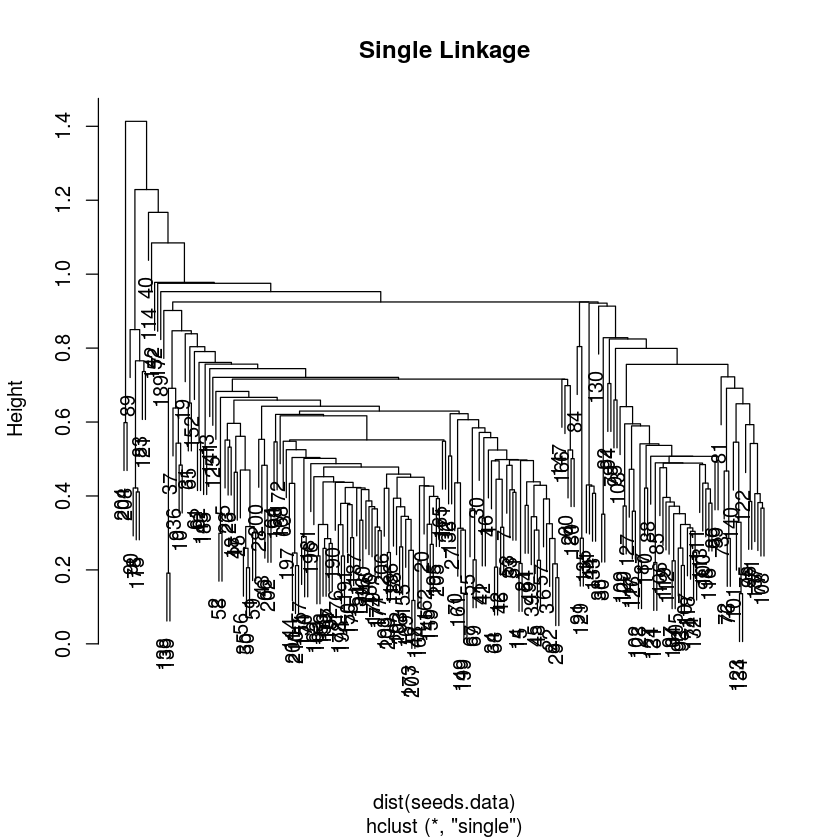

In [67]:
hc.single=hclust(dist(seeds.data), method="single")
plot(hc.single, main="Single Linkage")

(c) Using the `cutree()` function, make a cut on the tree that splits the data into 3 clusters. Plot the data again in terms of the variables in the 2nd and 6th columns, coloring the points by the clusters you just obtained. How does it compare to the result you got using k-means clustering?

<span style="color:blue">
Gyu-Ho's Answer: Most observations are classified as 1, while K-means clustering classifies them quite equally among 1, 2, and 3.
</span>

In [80]:
cutree(hc.single, 3)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1

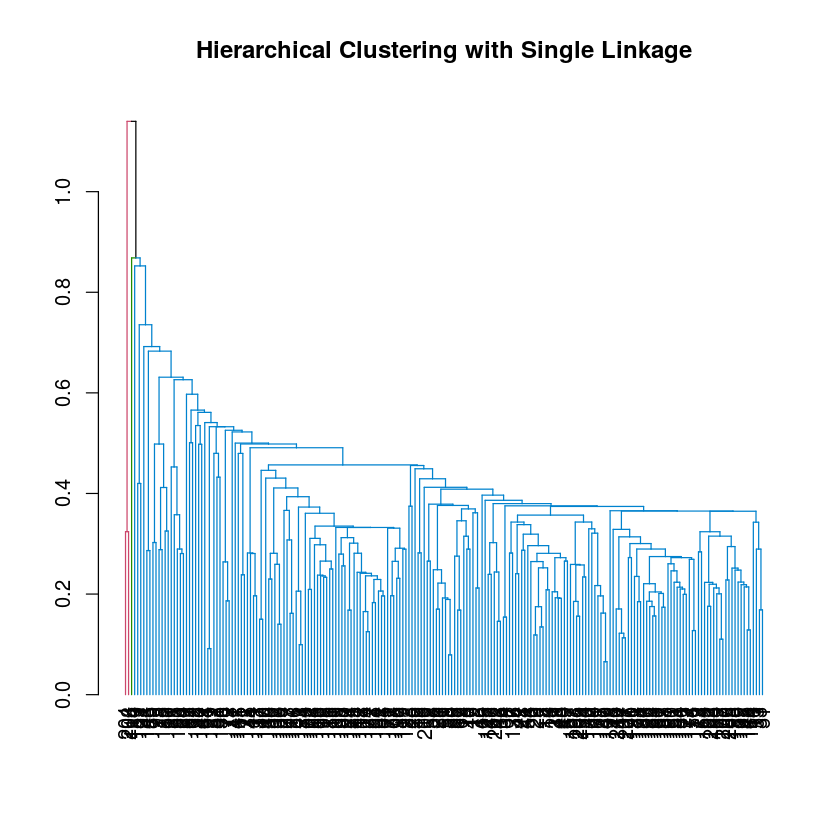

In [78]:
dend=as.dendrogram(hclust(dist(seeds.data[,2:6]), method="single"))
dend.color=color_branches(dend, k=3)
plot(dend.color, main="Hierarchical Clustering with Single Linkage")

(d) Using the `hclust()` function, perform complete linkage hierarchical clustering on the data. Plot the corresponding dendrogram. What do you see? If we wanted to cluster our data into 3 clusters, do you prefer single linkage clustering or complete linkage clustering in this example? Why?

<span style="color:blue">
Gyu-Ho's Answer: I prefer **complete linkage** because it builds more balanced dendrogram in this data.
</span>

In [81]:
hc.complete=hclust(dist(seeds.data), method="complete")
cutree(hc.complete, 3)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1
 [38] 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 2 1 1 1 3
 [75] 1 1 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 1 1 3 1 3 3 3 3 1 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

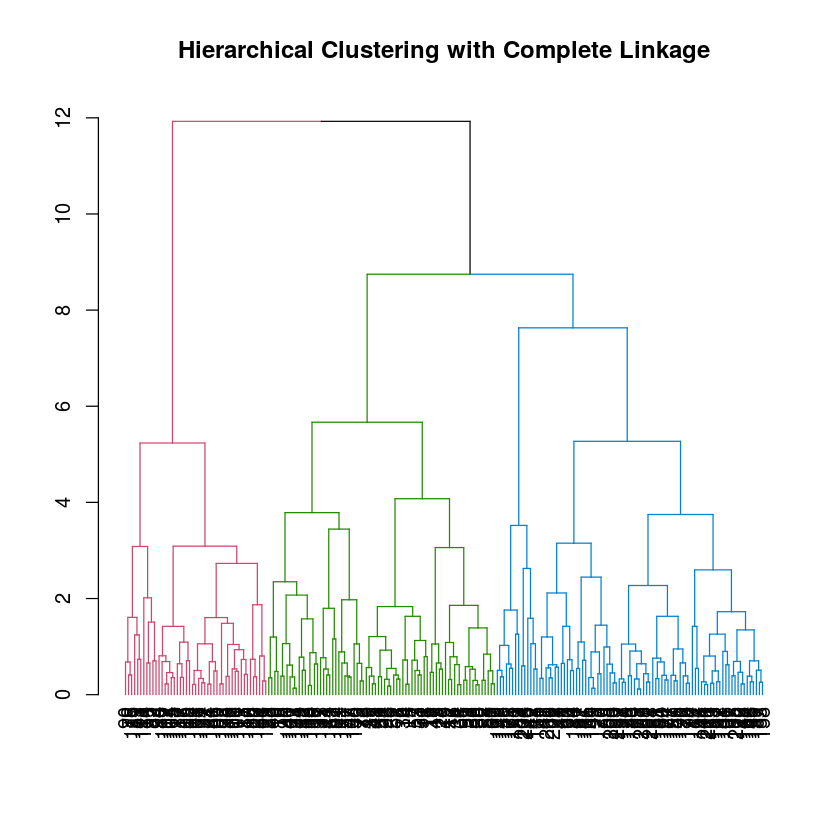

In [83]:
dend=as.dendrogram(hc.complete, method="complete")
dend.color=color_branches(dend, k=3)
plot(dend.color, main="Hierarchical Clustering with Complete Linkage")

(e) It turns out that there are three different types of wheat seeds: Kama, Rosa, and Canadian. If you had access to the class labels, briefly describe one way to build a model for classifying wheat seeds. Limit your answer to 1 sentence.

<span style="color:blue">
Gyu-Ho's Answer: Now we have response variable, *wheat seeds*, upon which we can train **logistic regression** model to predict seed class label, thus it's now a supervised learning.
</span>

###### Q5.

This problem uses the ALS data set. Recall that in previous problem sets we tried to predict the rate of progression of ALS in patients using linear regression, the Lasso, decision trees, boosting and random forests, and saw varying values of the test RMSE. Now we will see if we can improve on these results by first preprocessing the data in an unsupervised way.

In [84]:
# HW3 Q5
loaded = load("hw-1-als.RData")
head(loaded) # 'train.X' 'train.y' 'test.X' 'test.y'

rData = get(loaded)
head(rData)

ls() # 'Elite' 'college' 'isfar' 'loaded' 'op' 'rData' 'test.X' 'test.y' 'train.X' 'train.y'
head(test.X)

[1] "train.X" "train.y" "test.X"  "test.y"

Onset.Delta,Symptom.Speech,Symptom.WEAKNESS,Site.of.Onset.Onset..Bulbar,Site.of.Onset.Onset..Limb,Race...Caucasian,Age,Sex.Female,Sex.Male,Mother,⋯,max.slope.bp.systolic,min.slope.bp.systolic,last.slope.bp.systolic,mean.slope.bp.systolic,num.slope.bp.systolic.visits,sum.slope.bp.systolic,first.slope.bp.systolic.date,meansquares.slope.bp.systolic,sd.slope.bp.systolic,slope.bp.systolic.slope
-341,1,1,1,0,1,48,0,0,0,,4.198161,-4.475980,-4.475980,-1.36080094,3,-4.0824028,16.0,17.37794,3.940325,-0.3295982
-1768,0,1,0,1,1,63,1,0,0,,17.392381,-65.221429,17.392381,-17.60978571,4,-70.4391429,7.0,1266.88652,30.931892,29.9343926
-334,1,0,1,0,1,36,0,0,0,,18.446465,-6.297241,18.446465,3.26931374,3,9.8079412,14.5,128.46964,10.852706,13.2125602
-268,0,1,0,1,1,55,0,1,0,,16.601818,-6.522143,0.000000,2.08510931,4,8.3404372,5.5,80.29592,8.714828,-6.1248970
-440,0,1,0,1,1,37,0,0,0,,9.223232,-10.145556,9.223232,-1.79943454,3,-5.3983036,17.0,69.34490,8.130617,6.5662736
-773,0,1,0,1,1,68,1,0,0,,23.412821,-13.834848,-9.223232,0.08868493,4,0.3547397,6.5,206.15780,14.357922,-12.2633662


[1] "LoadLibraries"         "OJ.all.test.pred"      "OJ.all.test.table"    
 [4] "OJ.all.train.pred"     "OJ.all.train.table"    "OJ.poly.test.pred"    
 [7] "OJ.poly.test.table"    "OJ.poly.train.pred"    "OJ.poly.train.table"  
[10] "OJ.radial.test.pred"   "OJ.radial.test.table"  "OJ.radial.train.pred" 
[13] "OJ.radial.train.table" "OJ.test"               "OJ.test.pred"         
[16] "OJ.test.table"         "OJ.train"              "OJ.train.pred"        
[19] "OJ.train.table"        "colors"                "costs"                
[22] "data"                  "dend"                  "dend.color"           
[25] "hc.complete"           "hc.single"             "km.out"               
[28] "loaded"                "rData"                 "seeds"                
[31] "seeds.data"            "seeds.labels"          "svmfit"               
[34] "svmfit.tune"           "svmfit.tune.all"       "svmfit.tune.poly"     
[37] "svmfit.tune.radial"    "test"                  "test.X"               
[40] "test.y"                "train"                 "train.X"              
[43] "train.y"               "x1"                    "x2"

Onset.Delta,Symptom.Speech,Symptom.WEAKNESS,Site.of.Onset.Onset..Bulbar,Site.of.Onset.Onset..Limb,Race...Caucasian,Age,Sex.Female,Sex.Male,Mother,⋯,max.slope.bp.systolic,min.slope.bp.systolic,last.slope.bp.systolic,mean.slope.bp.systolic,num.slope.bp.systolic.visits,sum.slope.bp.systolic,first.slope.bp.systolic.date,meansquares.slope.bp.systolic,sd.slope.bp.systolic,slope.bp.systolic.slope
-1181,1,0,1,0,1,38,0,0,0,,0.981828,-8.300909,0.000000,-2.4396937,3,-7.3190811,5.5,23.28969,4.163843,5.003010
-1324,0,1,0,1,1,72,0,0,0,,0.000000,-9.818280,-9.818280,-4.9091398,2,-9.8182796,18.0,48.19931,4.909140,-8.920469
-1061,0,0,0,1,1,46,0,1,0,,6.522143,-5.533939,6.522143,0.4941017,2,0.9882035,11.0,36.58142,6.028041,14.677878
-1736,0,1,0,1,1,66,0,0,1,,55.800556,-87.928148,10.145556,-8.6064679,7,-60.2452751,4.5,1842.17436,42.048818,41.458842
-354,1,0,1,0,1,70,0,0,0,,6.917424,-10.870238,6.917424,-1.3176046,3,-3.9528139,6.0,55.33761,7.321307,3.759702
-500,1,1,1,0,1,37,0,0,0,,19.566429,-9.223232,0.000000,3.4477321,3,10.3431962,14.0,155.97105,12.003507,-9.605433


(a) Use the `prcomp()` function to run a principal components analysis on the training set. 

In [87]:
set.seed(2017)
train.X=train.X
test.X=test.X
pr.out=prcomp(train.X, scale = TRUE)

(b) Use the standard deviations to calculate the proportion of variance explained (PVE) by each principal component. Plot the PVE and the cumulative PVE.

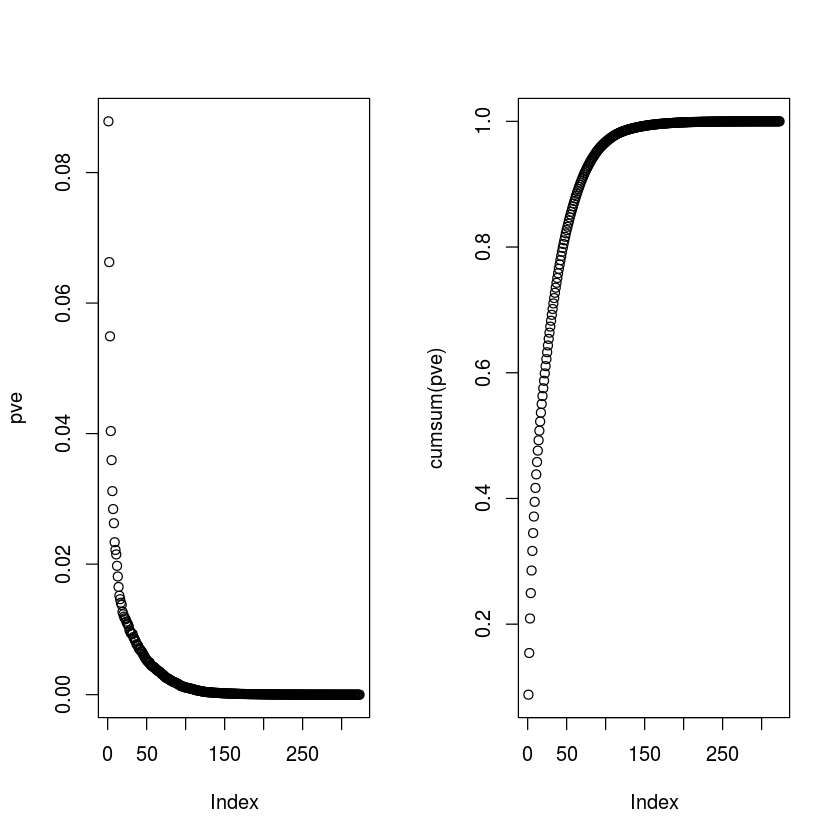

In [89]:
pr.var=pr.out$sdev^2
pve=pr.var/sum(pr.var)

par(mfrow=c(1,2))
plot(pve)
plot(cumsum(pve))

(c) Use the `pcr()` function in the `pls` library to run PCR on the training set us- ing cross-validation; pass along the parameter `ncomp = 100` and call your object `pcr.fit`. Plot the cross-validation RMSE via the function `validationplot()`.

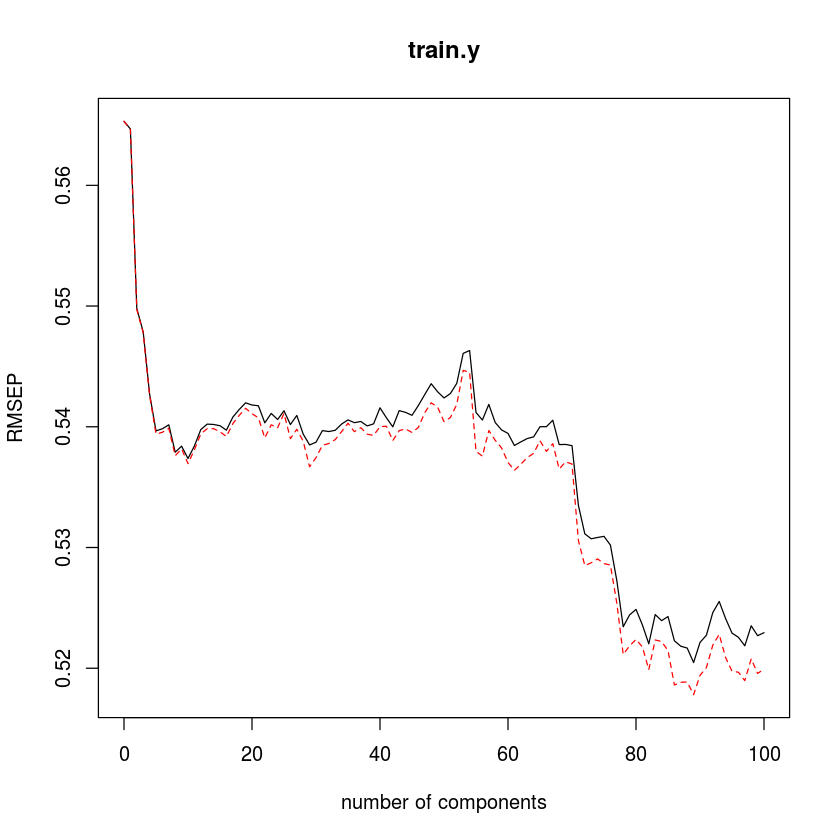

In [90]:
pcr.fit=pcr(train.y~., data=train.X, scale=TRUE, validation="CV", ncomp=100)
validationplot(pcr.fit)

(d) What is the number of components that minimize the RMSE? You can extract the errors for each component via `RMSEP(pcr.fit)$val[2,1,1:101]`.

In [91]:
which.min(RMSEP(pcr.fit)$val[2,1,1:101])

89 comps 
      90

(e) Compute the test set RMSE using the number of components you found in the previous item. How does this compare to our previous results? Recall that the test RMSE for linear regression was 0.7527, for the Lasso it was 0.5209, for Boosted Trees it was 0.5115 and for Random Forests it was 0.5123.

In [94]:
pcr.pred=predict(pcr.fit, test.X, ncomp=89)
pcr.RMSE=sqrt(mean((pcr.pred-test.y)^2))
pcr.RMSE

[1] 0.5510817

<span style="color:blue">
PCR test RMSE is 0.551081650356353, which performs better than linear regression but lower than Lasso, Boosted Trees, and Random Forests.
</span>